In [100]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math

HPF_IMAGE_PATH = '../images/e6/hpf.bmp'
LPF_IMAGE_PATH = '../images/e6/lpf.tif'
LAPLACIAN_PATH = '../images/e6/moon.tif'
GAUSIAN_PATH = '../images/e6/gausian.tif'


def readImage(imagePath, imageName):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Original ' + imageName)
    
    return grayscale


def filterImage(grayImage, imageFilter, filterName):

    # Filtering

    # take input from user
    # n -> filter size
    # filt -> filter kernel

    filt = imageFilter
    n = filt.shape[0]


    # constructing deviation from centre matrix
    # n -> filter size
    deviations = []
    for i in range(n):
        dev_row = []
        for j in range(n):
            elem = ( j - n//2, i - n//2)
            dev_row.append(elem)

        deviations.append(dev_row)


    # initialize result to store image
    result = np.zeros(grayImage.shape)



    # filtering logic using deviation mask
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            filter_prod = 0

            for k in range(n):
                for m in range(n):

                    x_shift = deviations[k][m][0]
                    y_shift = deviations[k][m][1]

                    x_index = i + y_shift  
                    y_index = j + x_shift

                    if (x_index < 0 or x_index >= grayImage.shape[0] or y_index < 0 or y_index >= grayImage.shape[1]):
                        continue

                    t = grayImage[i + y_shift, j + x_shift]
                    filter_prod = filter_prod + ( filt[k][m] * t )

            result[i, j] =  filter_prod

    plt.imshow(result, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Filtered Image Using ' + filterName)
    
    return result



def displayImage(image, imageName):
    plt.imshow(image, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title(imageName)
    


def generateGaussianFilter(size, sigma):
    
    #initialize
    result = np.zeros((size, size))
    
    center = size // 2
    sum_ = 0
    
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            
            factor = -( x**2 + y**2) / (2 * (sigma**2))
            result[i, j] = math.exp(factor)
            sum_ = sum_ + result[i, j]
   
    
    return (1/sum_) * result


# define filters

# laplacian filter
laplacian = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]   
])

# create a 15x15 averaging filter (low pass)
lpf = (1/15**2) * np.ones((15, 15))

# create a 3x3 high pass filter
hpf = (1/9) * np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]   
])

#  generate a gausian filter
gausian = generateGaussianFilter(5, 0.6)
    
    
            

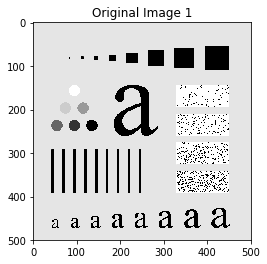

In [101]:
img1 = readImage(LPF_IMAGE_PATH, 'Image 1')

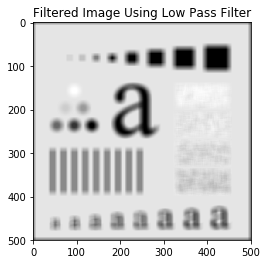

In [102]:
img1_f = filterImage(img1, lpf, 'Low Pass Filter')

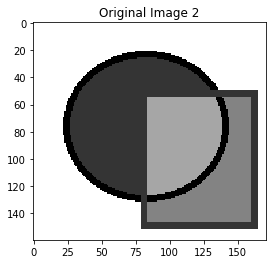

In [103]:
img2 = readImage(HPF_IMAGE_PATH, 'Image 2')

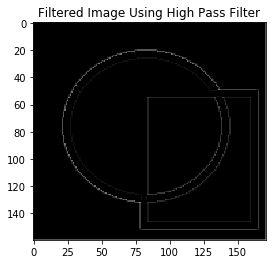

In [104]:
img2_f = filterImage(img2, hpf, 'High Pass Filter')

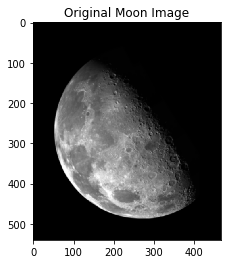

In [105]:
img3 = readImage(LAPLACIAN_PATH, 'Moon Image')

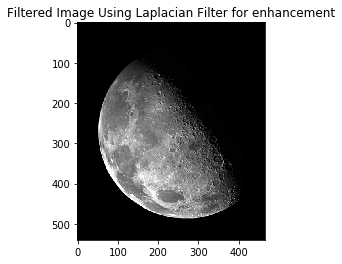

In [106]:
img3_f = filterImage(img3, laplacian, 'Laplacian Filter for enhancement')

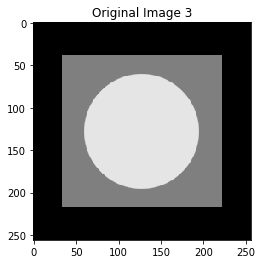

In [107]:
img4 = readImage(GAUSIAN_PATH, 'Image 3')

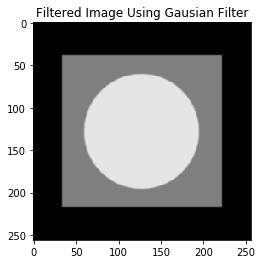

In [108]:
img4_fg = filterImage(img4, gausian, 'Gausian Filter')

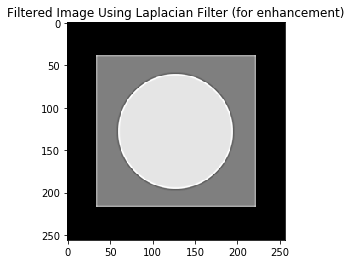

In [109]:
img4_fl = filterImage(img4_fg, laplacian, 'Laplacian Filter (for enhancement)')